# Import Datasets and libraries :

In [1]:
#Import TensorFlow
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 , mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 1: Load two common datasets :

In [2]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### checking shapes :

In [3]:
print(f'X train of cifar10 {x_train_cifar10.shape}')
print(f'y train of cifar10 {y_train_cifar10.shape}')
print('\n')
print(f'X Test of cifar10{x_test_cifar10.shape}')
print(f'y Test of cifar10{y_test_cifar10.shape}')
print('\n------------------------------------------------\n')
print(f'X Train of MNIST {x_train_mnist.shape}')
print(f'y Train of MNIST {y_train_mnist.shape}')
print('\n')
print(f'X Test of MNIST {x_test_mnist.shape}')
print(f'y Test of MNIST {y_test_mnist.shape}')

X train of cifar10 (50000, 32, 32, 3)
y train of cifar10 (50000, 1)


X Test of cifar10(10000, 32, 32, 3)
y Test of cifar10(10000, 1)

------------------------------------------------

X Train of MNIST (60000, 28, 28)
y Train of MNIST (60000,)


X Test of MNIST (10000, 28, 28)
y Test of MNIST (10000,)


In [4]:
print(f'Classes/Categories of y train we want our model to predict in cifar10 {np.unique(y_train_cifar10)}')
print(f'Classes/Categories of y train we want our model to predict in MNIST {np.unique(y_train_mnist)}')

Classes/Categories of y train we want our model to predict in cifar10 [0 1 2 3 4 5 6 7 8 9]
Classes/Categories of y train we want our model to predict in MNIST [0 1 2 3 4 5 6 7 8 9]


## seeing our labels :

### For cifar10 Data set :

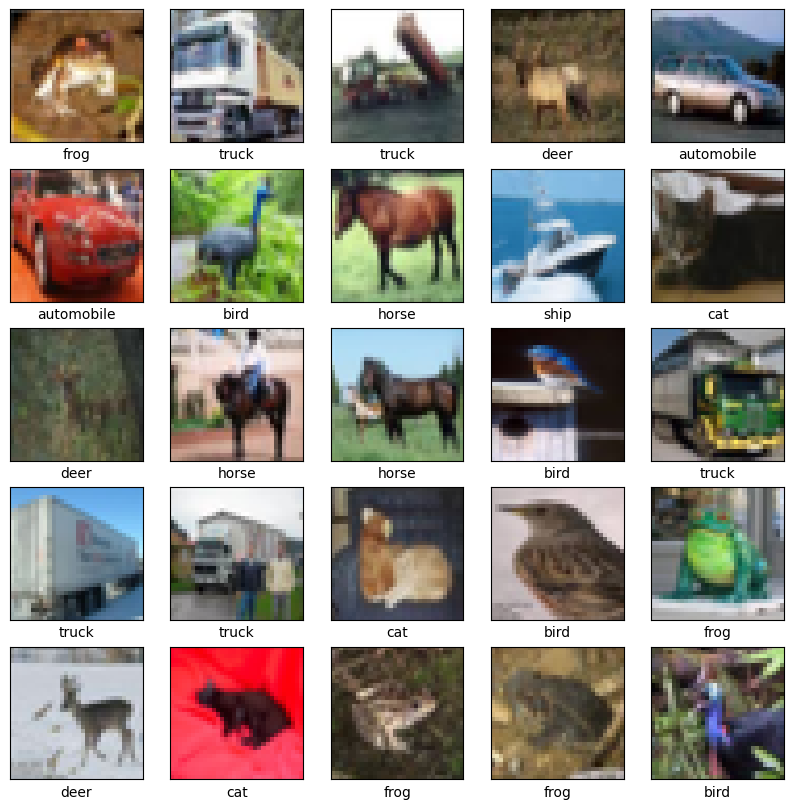

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_cifar10[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train_cifar10[i][0]])
plt.show()

### For MNIST Data set :

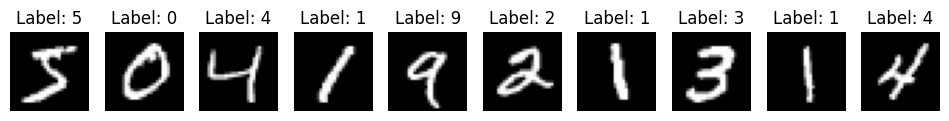

In [6]:
# Visualize a few sample images
num_samples_to_visualize = 10

plt.figure(figsize=(12, 5))

for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(x_train_mnist[i], cmap='gray')
    plt.title(f"Label: {y_train_mnist[i]}")
    plt.axis('off')

plt.show()

# Step 2: Pre-processing


In [7]:
# Normalize the pixel values to be in the range [0, 1] for both datasets
x_train_cifar10, x_test_cifar10 = x_train_cifar10 / 255.0, x_test_cifar10 / 255.0
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

# Step 3: Use LeNet-5 for classification


In [8]:
# For cifar10 because of the images are RGB so we use input shape of (h , w , 3)
model_for_cifar10 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# For MNIST because of the images are jpg so we use input shape of (h , w , 1)
model_for_MNIST = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Print LeNet-5 architecture


In [9]:
model_for_cifar10.summary()
model_for_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Step 5: Print number of trainable parameters in each layer

In [10]:
# Print number of trainable parameters in each layer
print("Print number of trainable parameters in each layer of cifar10 model")
for layer in model_for_cifar10.layers:
    print(f"Layer: {layer.name}, Trainable Parameters: {layer.count_params()}")

# Print total number of trainable parameters in the model
print(f"Total Trainable Parameters: {model_for_cifar10.count_params()}")
print('\n')

print("Print number of trainable parameters in each layer of MNIST model")
for layer in model_for_MNIST.layers:
    print(f"Layer: {layer.name}, Trainable Parameters: {layer.count_params()}")

# Print total number of trainable parameters in the model
print(f"Total Trainable Parameters: {model_for_MNIST.count_params()}")

Print number of trainable parameters in each layer of cifar10 model
Layer: conv2d, Trainable Parameters: 456
Layer: max_pooling2d, Trainable Parameters: 0
Layer: conv2d_1, Trainable Parameters: 2416
Layer: max_pooling2d_1, Trainable Parameters: 0
Layer: flatten, Trainable Parameters: 0
Layer: dense, Trainable Parameters: 48120
Layer: dense_1, Trainable Parameters: 10164
Layer: dense_2, Trainable Parameters: 850
Total Trainable Parameters: 62006


Print number of trainable parameters in each layer of MNIST model
Layer: conv2d_2, Trainable Parameters: 156
Layer: max_pooling2d_2, Trainable Parameters: 0
Layer: conv2d_3, Trainable Parameters: 2416
Layer: max_pooling2d_3, Trainable Parameters: 0
Layer: flatten_1, Trainable Parameters: 0
Layer: dense_3, Trainable Parameters: 30840
Layer: dense_4, Trainable Parameters: 10164
Layer: dense_5, Trainable Parameters: 850
Total Trainable Parameters: 44426


In [11]:
# Compile the cifar10 model
model_for_cifar10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cifar10_history = model_for_cifar10.fit(x_train_cifar10, y_train_cifar10, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 13s 5ms/step - loss: 1.7045 - accuracy: 0.3801 - val_loss: 1.4994 - val_accuracy: 0.4622
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 1.4108 - accuracy: 0.4929 - val_loss: 1.3334 - val_accuracy: 0.5273
Epoch 3/20
625/625 [==============================] - 2s 4ms/step - loss: 1.2904 - accuracy: 0.5422 - val_loss: 1.2718 - val_accuracy: 0.5486
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 1.2021 - accuracy: 0.5728 - val_loss: 1.2501 - val_accuracy: 0.5623
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 1.1440 - accuracy: 0.5937 - val_loss: 1.2109 - val_accuracy: 0.5716
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 1.0887 - accuracy: 0.6129 - val_loss: 1.1742 - val_accuracy: 0.5848
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 1.0543 - accuracy: 0.6280 - val_loss: 1.1613 - val_accuracy: 0.5931
Epoch

In [12]:
# Compile the MNIST model
model_for_MNIST.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_history = model_for_MNIST.fit(x_train_mnist, y_train_mnist, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 5s 4ms/step - loss: 0.2675 - accuracy: 0.9228 - val_loss: 0.0963 - val_accuracy: 0.9726
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0787 - accuracy: 0.9754 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0565 - accuracy: 0.9817 - val_loss: 0.0488 - val_accuracy: 0.9863
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0471 - val_accuracy: 0.9866
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0520 - val_accuracy: 0.9860
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 

## printing the learning curve of cifar10 Dataset to avoid overfitting :

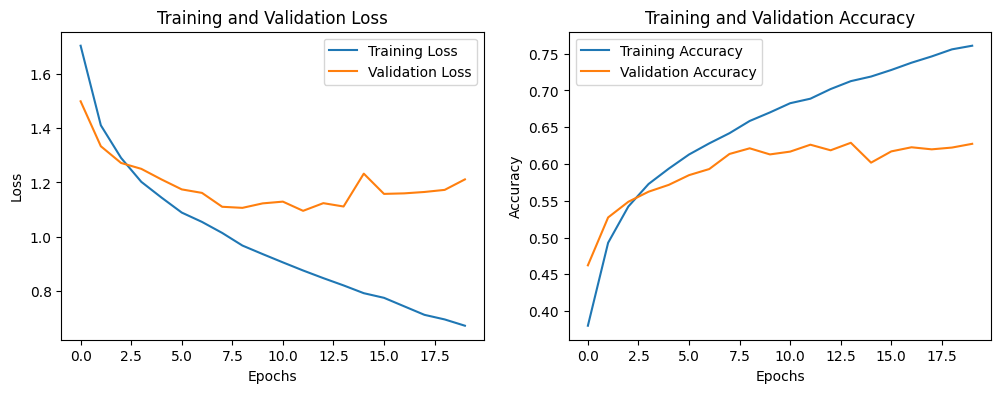

In [13]:
# Access the training history
cifar10_loss = cifar10_history.history['loss']
cifar10_val_loss = cifar10_history.history['val_loss']
cifar10_accuracy = cifar10_history.history['accuracy']
cifar10_val_accuracy = cifar10_history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cifar10_loss, label='Training Loss')
plt.plot(cifar10_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cifar10_accuracy, label='Training Accuracy')
plt.plot(cifar10_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## printing the learning curve of MNIST Dataset to avoid overfitting :

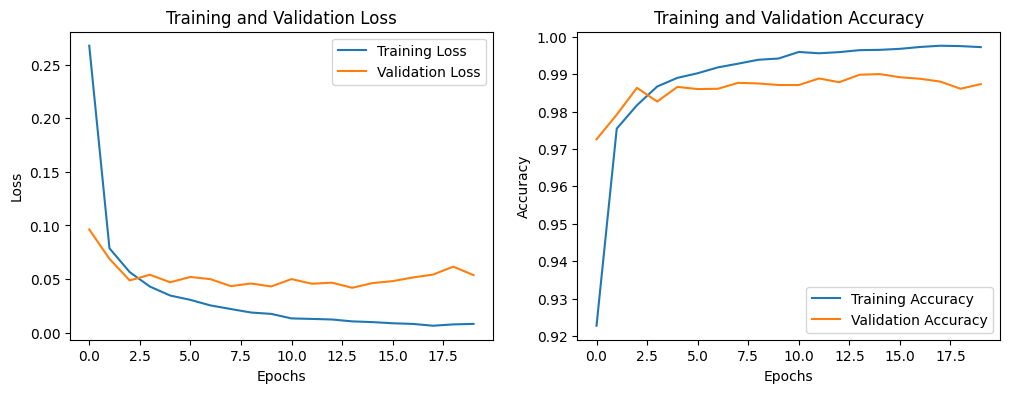

In [14]:
# Access the training history
mnist_loss = mnist_history.history['loss']
mnist_val_loss = mnist_history.history['val_loss']
mnist_accuracy = mnist_history.history['accuracy']
mnist_val_accuracy = mnist_history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mnist_loss, label='Training Loss')
plt.plot(mnist_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(mnist_accuracy, label='Training Accuracy')
plt.plot(mnist_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Step 6: Print confusion matrix relative to testing samples :

In [15]:
# Make predictions on the test set
y_pred_cifar10 = model_for_cifar10.predict(x_test_cifar10)
y_pred_mnist = model_for_MNIST.predict(x_test_mnist)

313/313 [==============================] - 1s 2ms/step


In [16]:
# Convert to class labels
y_pred_cifar10 = np.argmax(y_pred_cifar10, axis=1)  
y_pred_mnist = np.argmax(y_pred_mnist, axis=1) 

In [17]:
print(y_pred_cifar10.shape)
print(y_pred_mnist.shape)

(10000,)
(10000,)


In [18]:
print(y_test_cifar10.shape)
print(y_test_mnist.shape)

(10000, 1)
(10000,)


## Confusion Matrix for cifar10

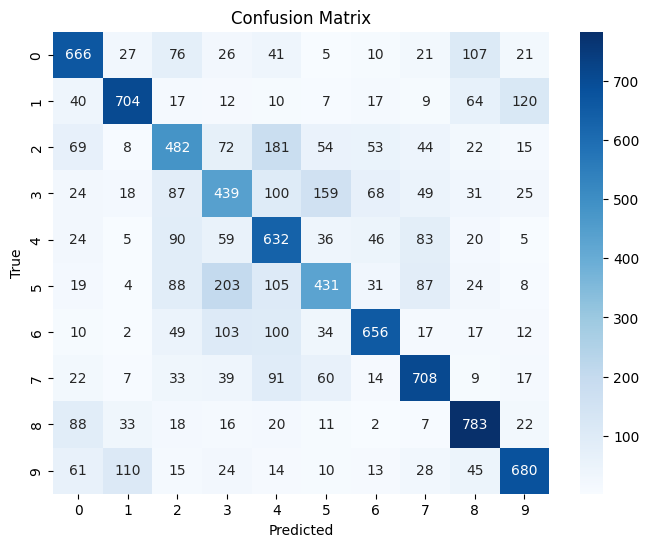

In [19]:
# Calculate the confusion matrix
cm_cifar10 = confusion_matrix(y_test_cifar10, y_pred_cifar10)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cifar10, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_cifar10, y_pred_cifar10, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.6213442384872756
Recall: 0.6181
F1 Score: 0.6175308888461275


#### `Precision (0.6111):` This indicates the model's ability to correctly classify positive instances. In this case, the model achieves a precision of approximately 0.604, meaning that when it predicts a class, it is correct about 61.1% of the time.

#### `Recall (0.6090):` Recall represents the model's ability to capture all positive instances. A recall of around 0.593 suggests that the model is able to correctly identify about 60.9% of the actual positive instances.

#### `F1 Score (0.6053):` The F1 score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance. In this case, the F1 score is approximately 60.53%, which is a reasonable balance between precision and recall.

## Confusion Matrix for mnist 

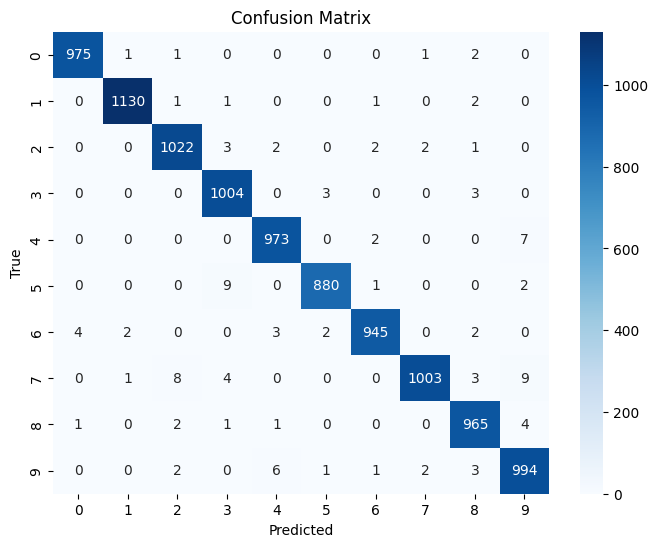

In [21]:
# Calculate the confusion matrix
cm_mnist = confusion_matrix(y_test_mnist, y_pred_mnist)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_mnist, y_pred_mnist, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.9891013144388158
Recall: 0.989024881796524
F1 Score: 0.9890449816537048


#### `Precision (0.9892):` This indicates that the model's ability to correctly classify positive instances is extremely high. With a precision of approximately 98.92%, when the model predicts a class as positive, it is correct about 99.01% of the time.

#### `Recall (0.9891):` Recall measures the model's ability to capture all positive instances accurately. In this case, the model is able to correctly identify about 98.91% of the actual positive instances.

#### `F1 Score (0.9891):` The F1 score, which is the harmonic mean of precision and recall, is also very high. An F1 score of approximately 98.91% indicates a well-balanced performance between precision and recall.

# Step 7: Comment on your results

### The LeNet-5 model was originally designed for handwritten digit recognition on the MNIST dataset, so it is expected to perform better on MNIST compared to CIFAR-10. However, the performance of the LeNet-5 model on CIFAR-10 is likely to be significantly worse than on MNIST, and here's why:

## `1- Data Complexity:`

### - MNIST consists of grayscale images of handwritten digits (0-9) with a resolution of 28x28 pixels. These images are relatively simple, and the LeNet-5 architecture was designed with such simplicity in mind.
### - CIFAR-10, on the other hand, contains color images of 32x32 pixels that belong to 10 different object classes. The complexity of the images and the diversity of classes make CIFAR-10 a more challenging dataset.

## `2- Model Architecture:`

### LeNet-5 is a relatively simple convolutional neural network (CNN) architecture compared to more modern architectures like VGG, ResNet, or Inception, which have been specifically designed to handle the increased complexity of datasets like CIFAR-10.

## `3- Capacity and Parameters:`

### LeNet-5 has a limited capacity in terms of the number of parameters, which might not be sufficient to capture the intricate features present in CIFAR-10 images.

## `4- Overfitting:`

### CIFAR-10 is a more complex dataset, and LeNet-5 may struggle to generalize well. It is possible that the model could overfit the data, leading to poor performance on the test set. 
### The model for cifar10 dataset started overfitting after 20 epochs.